In [ ]:
!pip install 'jax == 0.4.3' 
!pip install 'jaxlib == 0.4.3'
#!pip install jax
#!pip install jaxlib
#!pip install 'pennylane==0.29.0'
!pip install pennylane #version: 0.29.1 (latest stable release)

In [ ]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import jax.numpy as jnp
import pennylane as qml
import numpy as np
import time
import jax
from jax.config import config 
config.update("jax_enable_x64", True)

In [ ]:
@jax.jit
def circuit(key, param):
    # Notice how the device construction now happens within the jitted method.
    # Also note the added '.jax' to the device path.
    dev = qml.device("default.qubit.jax", wires=2, shots=None, prng_key=key)

    # Now we can create our qnode within the circuit function.
    @qml.qnode(dev, interface="jax", diff_method='backprop')
    def my_circuit():
        qml.RX(param, wires=0)
        qml.RX(param, wires=1)
        qml.CNOT(wires=[0, 1])
        #print([qml.expval(qml.PauliZ(j)) for j in range(2)])
        return [qml.expval(qml.PauliZ(j)) for j in range(2)]
    return my_circuit()

In [ ]:
key1 = jax.random.PRNGKey(0)

print('key1 =', key1)
st = time.time()
times = [st]
for i in tqdm(range(16*64*64)): #27000*64*64)):
    _ = circuit(key1, jnp.pi/2)
    times.append(time.time())
    
et = time.time()    


key1 = [0 0]


  0%|          | 0/65536 [00:00<?, ?it/s]

In [ ]:
a = circuit(key1, jnp.array([jnp.pi/2,jnp.pi/2]))

In [ ]:
dx = times[1] - times[0]
dtimes = np.gradient(np.array(times), dx)

In [ ]:
def circuit2(param):
    dev = qml.device("default.qubit", wires=2, shots=10)

    # Now we can create our qnode within the circuit function.    
    def my_circuit():
        qml.RX(param, wires=0)
        qml.CNOT(wires=[0, 1])
        return qml.sample(qml.PauliZ(0))
    return my_circuit()

In [ ]:
st = time.time()
times2 = [st]
for i in tqdm(range(256*256)):
    _ = circuit2(np.pi/2)
    times2.append(time.time())
    
et = time.time()    


  0%|          | 0/65536 [00:00<?, ?it/s]

In [ ]:
dx = times2[1] - times2[0]
dtimes2 = np.gradient(np.array(times2), dx)

(-0.10829308081913813, 0.1)

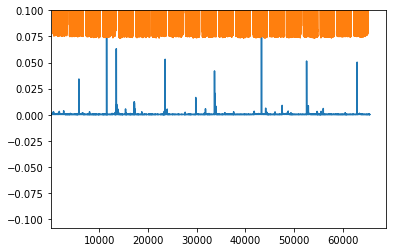

In [ ]:
plt.plot(dtimes)
plt.plot(dtimes2)
plt.xlim([100, None])
plt.ylim([None, 0.1])

In [ ]:
print('{:<6s}{:<30s}{:<30s}'.format('','Jax','No Jax'))
print('{:<6s}{:<30s}{:<30s}'.format('Min',  str(dtimes[200:].min()),  str(dtimes2[200:].min())))
print('{:<6s}{:<30s}{:<30s}'.format('Max',  str(dtimes[200:].max()),  str(dtimes2[200:].max())))
print('{:<6s}{:<30s}{:<30s}'.format('Mean', str(dtimes[200:].mean()), str(dtimes2[200:].mean())))
print('{:<6s}{:<30s}{:<30s}'.format('Std',  str(dtimes[200:].std()),  str(dtimes2[200:].std())))

      Jax                           No Jax                        
Min   0.0002582526926641044         0.07329299132947976           
Max   0.368386072584198             0.4184368978805395            
Mean  0.00034332534205691546        0.1008631367767404            
Std   0.0024626192893856926         0.03457404229808569           
